In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/fig_2_data/"
path = "../../cata/run/results/exp1_ode_100000/single/"

In [58]:
# ode_df = pd.read_csv(os.path.join(path, "ode_log.csv"))
# network_df = pd.read_csv(os.path.join(path, "network_log.csv"))
network_df = pd.read_csv(os.path.join(path, "data_logger_network.csv"))
ode_df = pd.read_csv(os.path.join(path, "data_logger_ode.csv"))
network_df # Nan maybe because we are computing the error at certain time steps
ode_df

,teacher_index,generalisation_error_0,generalisation_error_1,log_generalisation_error_0,log_generalisation_error_1,student_head_0_weight_0,student_head_0_weight_1,student_head_1_weight_0,student_head_1_weight_1,teacher_head_0_weight_0,teacher_head_1_weight_0,student_self_overlap_0_0,student_self_overlap_0_1,student_self_overlap_1_0,student_self_overlap_1_1,student_teacher_0_overlap_0_0,student_teacher_0_overlap_1_0,student_teacher_1_overlap_0_0,student_teacher_1_overlap_1_0
0,NaN,0.166672,0.166046,-0.778137,-0.779773,1.000000,1.000000,1.000000,1.000000,1.0,-1.0,0.000001,4.049666e-09,4.049666e-09,0.000001,0.000007,-0.000018,0.000006,-0.000016
1,0.0,0.166672,0.166046,-0.778137,-0.779773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.166537,0.166670,-0.778489,-0.778142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.166402,0.167294,-0.778842,-0.776520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.166267,0.167917,-0.779194,-0.774906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1.0,0.743475,0.013428,-0.128733,-1.871978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,1.0,0.743512,0.013421,-0.128712,-1.872225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,1.0,0.743549,0.013413,-0.128690,-1.872472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,1.0,0.743586,0.013405,-0.128669,-1.872720,0.949276,0.949266,0.723318,0.723345,1.0,-1.0,0.267184,2.672014e-01,2.672014e-01,0.267222,-0.433318,-0.433361,-0.499058,-0.499095


In [59]:
network_df = network_df.dropna() 
ode_df = ode_df.dropna()
print(network_df.shape)
print(ode_df.shape)

(1000, 20)
(1000, 19)


C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_22172\3013041341.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


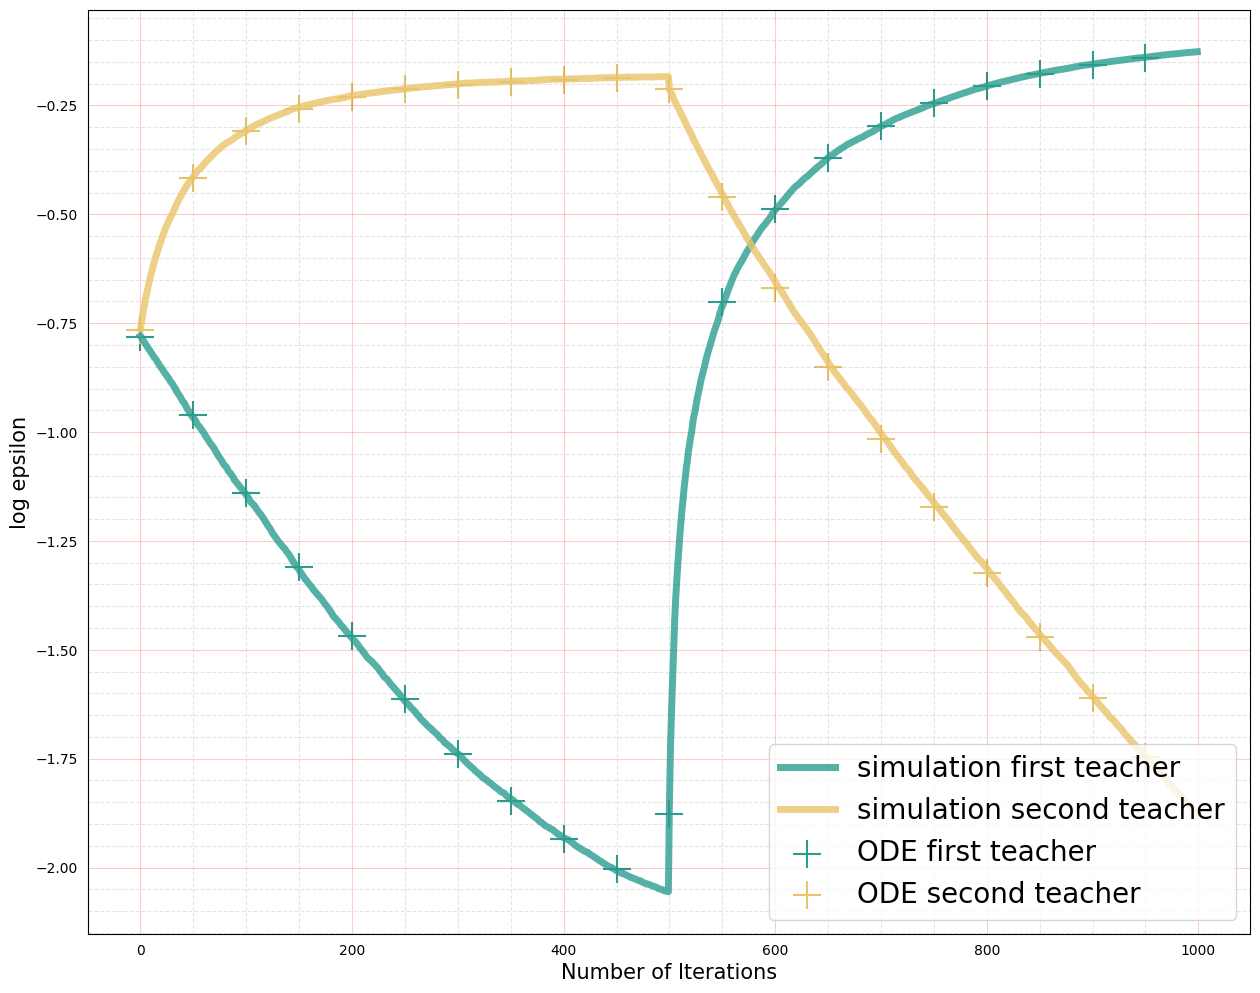

In [60]:
f = 50

fig1 = plt.figure(figsize=(15,12))
network_error_0 = np.array(network_df["log_generalisation_error_0"])
network_error_1 = np.array(network_df["log_generalisation_error_1"])
ode_error_0 = np.array(ode_df["log_generalisation_error_0"])
ode_error_1 = np.array(ode_df["log_generalisation_error_1"])
plt.plot(range(len(network_error_0)), network_error_0, alpha=0.8, linewidth=5, color="#2A9D8F", label="simulation first teacher")
plt.plot(range(len(network_error_1)), network_error_1, alpha=0.8, linewidth=5, color="#E9C46A", label="simulation second teacher")
plt.scatter(range(len(ode_error_0))[::f], ode_error_0[::f], marker="+", color="#2A9D8F", s=400, label="ODE first teacher")
plt.scatter(range(len(ode_error_1))[::f], ode_error_1[::f], marker="+", color="#E9C46A", s=400, label="ODE second teacher")
# plt.xlim(0, 10000)
# plt.ylim(-4.5, -0.5)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True
        ) 

plt.xlabel("Number of Iterations", fontsize=15)
plt.ylabel("log epsilon", fontsize=15)

plt.legend(loc="best", fontsize=20, frameon=True) 

fig1.show()
fig1.savefig("ode_verification_error_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_22172\3991990732.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


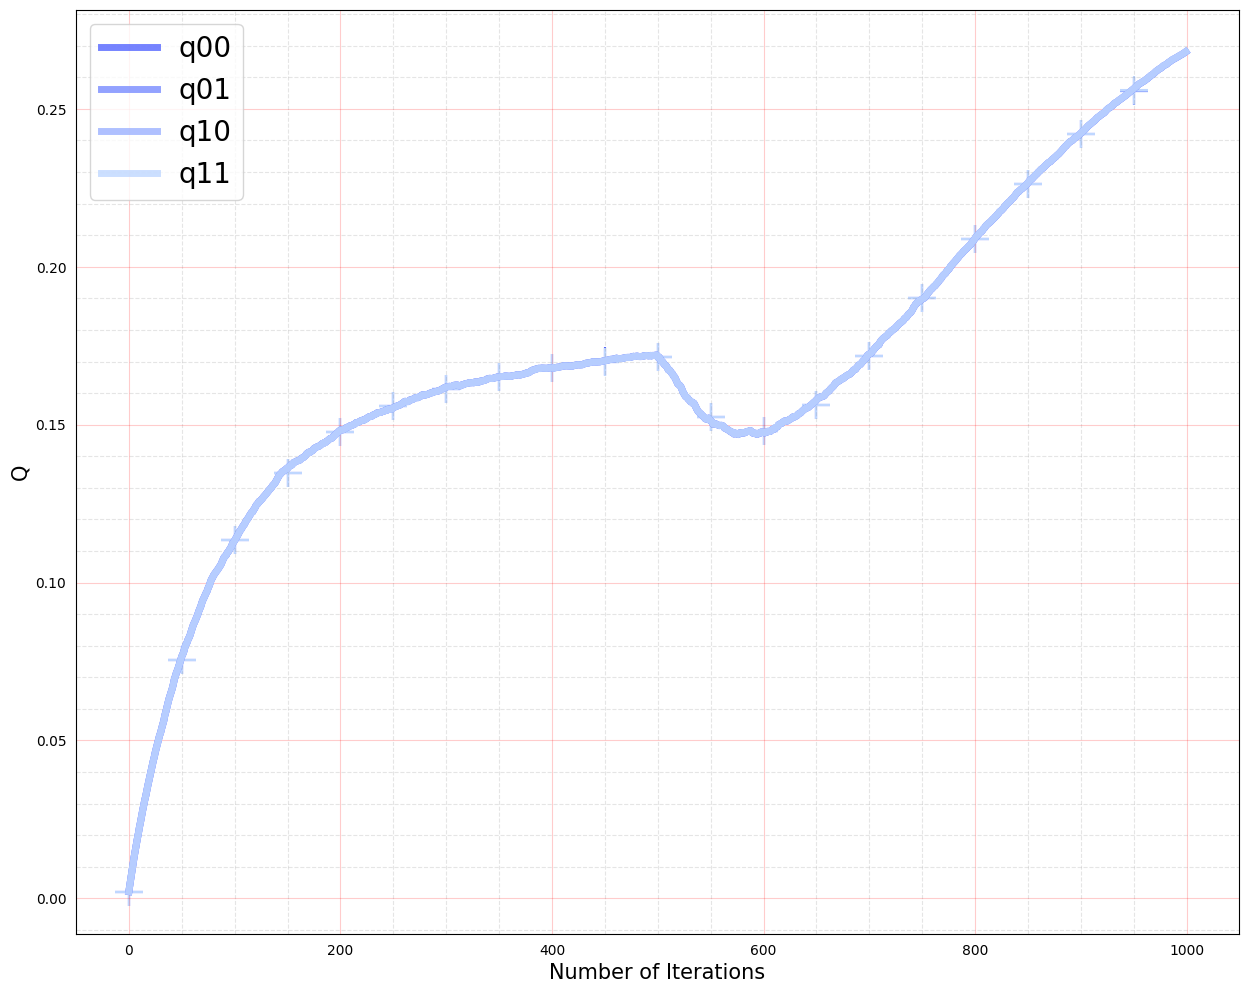

In [61]:
f = 50

fig2 = plt.figure(figsize=(15,12))
network_error_q_00 = np.array(network_df["student_self_overlap_0_0"])
network_error_q_01 = np.array(network_df["student_self_overlap_0_1"])
network_error_q_10 = np.array(network_df["student_self_overlap_1_0"])
network_error_q_11 = np.array(network_df["student_self_overlap_1_1"])

ode_error_q_00 = np.array(ode_df["student_self_overlap_0_0"])
ode_error_q_01 = np.array(ode_df["student_self_overlap_0_1"])
ode_error_q_10 = np.array(ode_df["student_self_overlap_1_0"])
ode_error_q_11 = np.array(ode_df["student_self_overlap_1_1"])

plt.plot(range(len(network_error_q_00)), network_error_q_00, alpha=0.8, linewidth=5, color="#5465ff", label="q00")
plt.plot(range(len(network_error_q_01)), network_error_q_01, alpha=0.8, linewidth=5, color="#788bff", label="q01")
plt.plot(range(len(network_error_q_10)), network_error_q_10, alpha=0.8, linewidth=5, color="#9bb1ff", label="q10")
plt.plot(range(len(network_error_q_11)), network_error_q_11, alpha=0.8, linewidth=5, color="#bfd7ff", label="q11")

plt.scatter(range(len(ode_error_q_00))[::f], ode_error_q_00[::f], color="#5465ff", marker="+", s=400)
plt.scatter(range(len(ode_error_q_01))[::f], ode_error_q_01[::f], color="#788bff", marker="+", s=400)
plt.scatter(range(len(ode_error_q_10))[::f], ode_error_q_10[::f], color="#9bb1ff", marker="+", s=400)
plt.scatter(range(len(ode_error_q_11))[::f], ode_error_q_11[::f], color="#bfd7ff", marker="+", s=400)

# plt.xlim(0, 10000)
# plt.ylim(0, 1.2)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True
        ) 

plt.xlabel("Number of Iterations", fontsize=15)
plt.ylabel("Q", fontsize=15)

plt.legend(loc="best", fontsize=20, frameon=True) 

fig2.show()
fig2.savefig("ode_verification_q_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_22172\3732683689.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


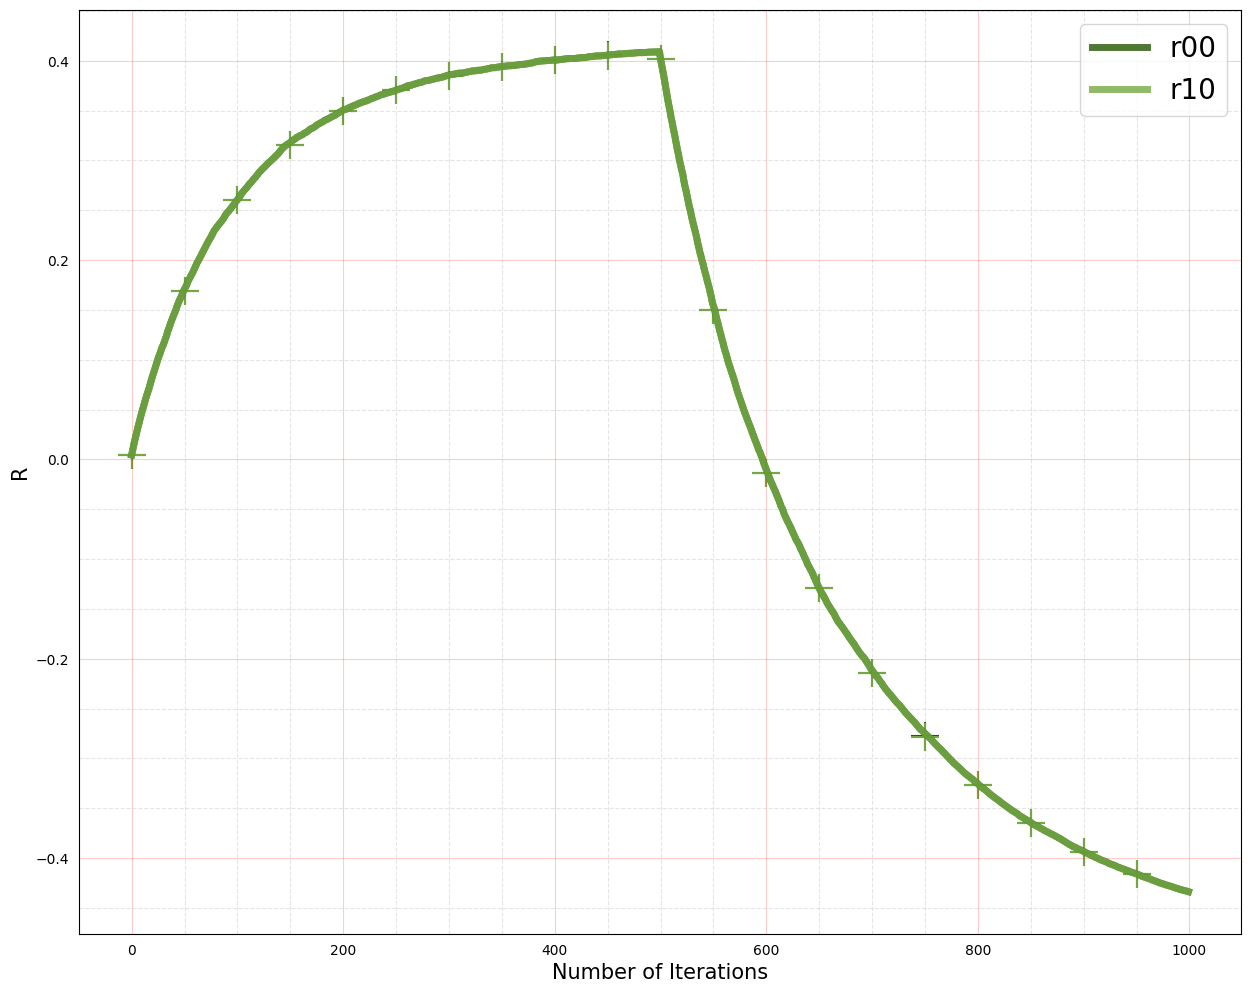

In [62]:
f = 50

fig3 = plt.figure(figsize=(15,12))
network_error_r_00 = np.array(network_df["student_teacher_0_overlap_0_0"])
network_error_r_10 = np.array(network_df["student_teacher_0_overlap_1_0"])

ode_error_r_00 = np.array(ode_df["student_teacher_0_overlap_0_0"])
ode_error_r_10 = np.array(ode_df["student_teacher_0_overlap_1_0"])

plt.plot(range(len(network_error_r_00)), network_error_r_00, alpha=0.8, linewidth=5, color="#245501", label="r00")
plt.plot(range(len(network_error_r_10)), network_error_r_10, alpha=0.8, linewidth=5, color="#73a942", label="r10")

plt.scatter(range(len(ode_error_r_00))[::f], ode_error_r_00[::f], color="#245501", marker="+", s=400)
plt.scatter(range(len(ode_error_r_10))[::f], ode_error_r_10[::f], color="#73a942", marker="+", s=400)

# plt.xlim(0, 10000)
# plt.ylim(-1.2, 0.05)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)


plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True
        )

plt.xlabel("Number of Iterations", fontsize=15)
plt.ylabel("R", fontsize=15)

plt.legend(loc="best", fontsize=20, frameon=True) 

fig3.show()
fig3.savefig("ode_verification_r_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_22172\2161076606.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


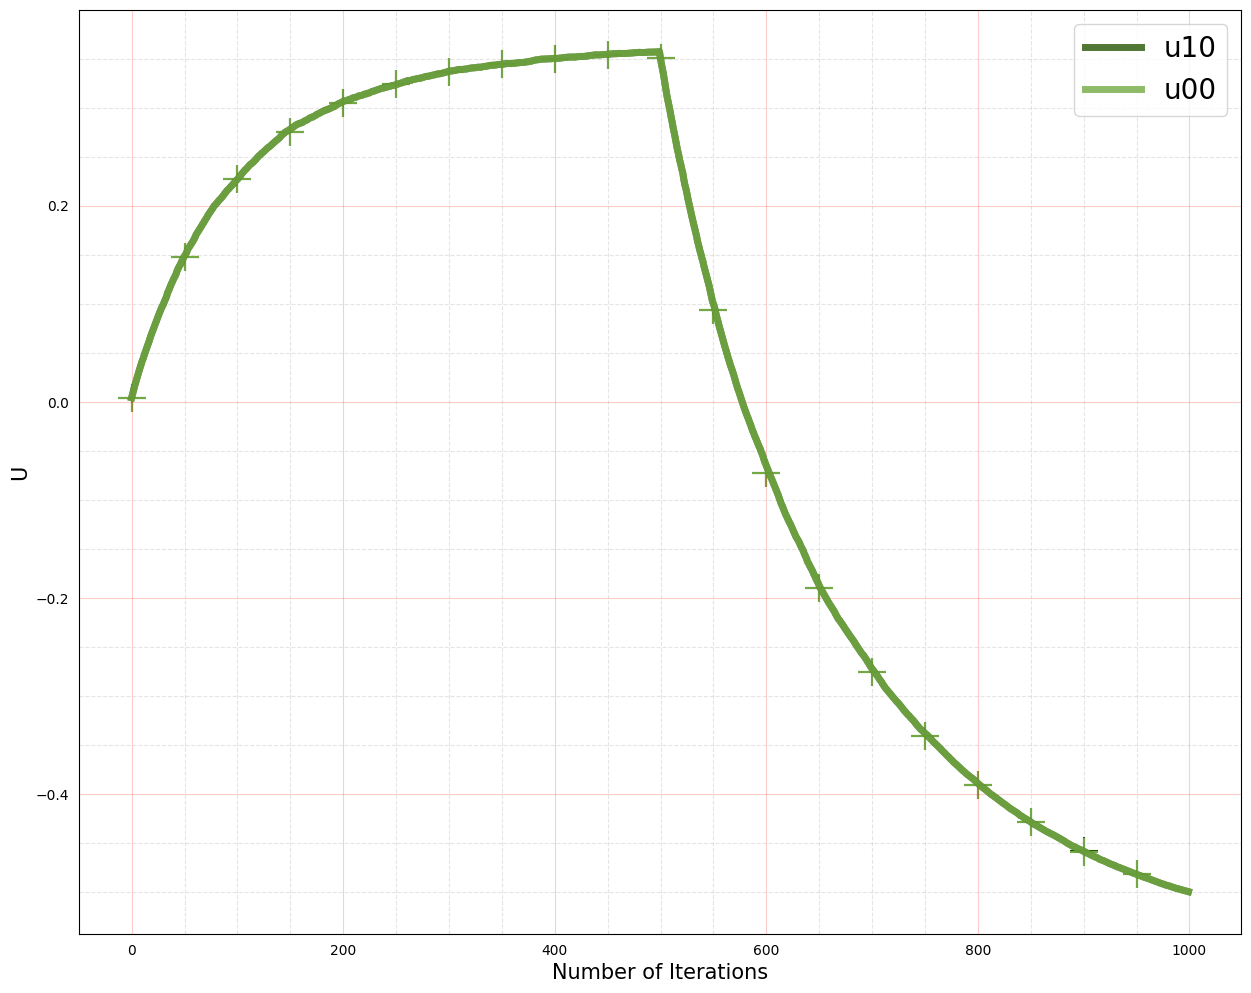

In [63]:
f = 50

fig4 = plt.figure(figsize=(15,12))
network_error_u_00 = np.array(network_df["student_teacher_1_overlap_0_0"])
network_error_u_10 = np.array(network_df["student_teacher_1_overlap_1_0"])

ode_error_u_00 = np.array(ode_df["student_teacher_1_overlap_0_0"])
ode_error_u_10 = np.array(ode_df["student_teacher_1_overlap_1_0"])

plt.plot(range(len(network_error_u_00)), network_error_u_00, alpha=0.8, linewidth=5, color="#245501", label="u10")
plt.plot(range(len(network_error_u_10)), network_error_u_10, alpha=0.8, linewidth=5, color="#73a942", label="u00")

plt.scatter(range(len(ode_error_u_00))[::f], ode_error_u_00[::f], color="#245501", marker="+", s=400)
plt.scatter(range(len(ode_error_u_10))[::f], ode_error_u_10[::f], color="#73a942", marker="+", s=400)

# plt.xlim(0, 10000)
# plt.ylim(-1.2, 0.05)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True
        ) 

plt.xlabel("Number of Iterations", fontsize=15)
plt.ylabel("U", fontsize=15)

plt.legend(loc="best", fontsize=20, frameon=True) 

fig4.show()
fig4.savefig("ode_verification_u_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_22172\83193225.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


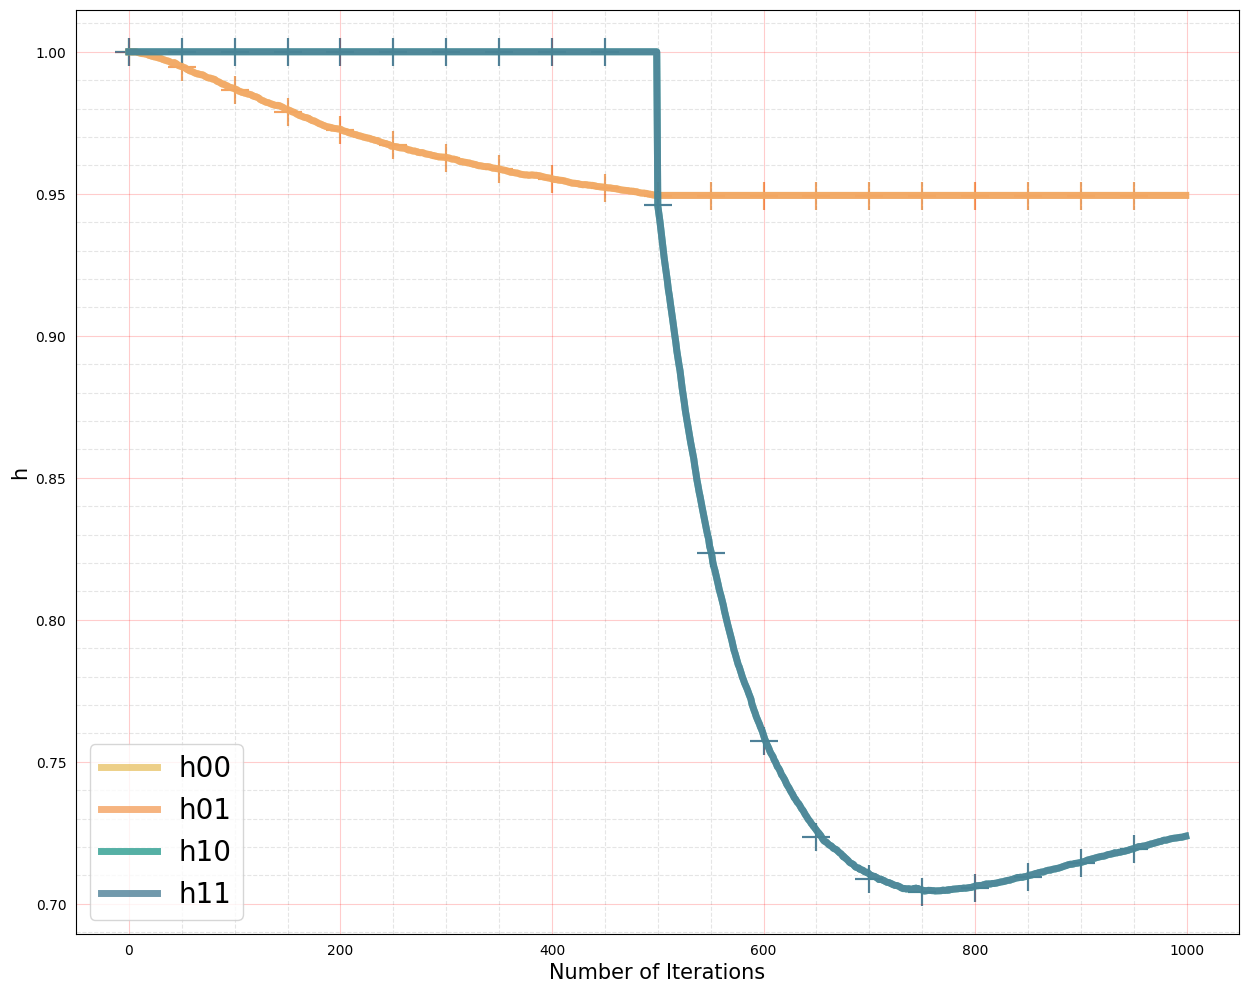

In [68]:
f = 50

fig5 = plt.figure(figsize=(15,12))
network_error_head_0_0 = np.array(network_df["student_head_0_weight_0"])
network_error_head_0_1 = np.array(network_df["student_head_0_weight_1"])
network_error_head_1_0 = np.array(network_df["student_head_1_weight_0"])
network_error_head_1_1 = np.array(network_df["student_head_1_weight_1"])

ode_error_head_0_0 = np.array(ode_df["student_head_0_weight_0"])
ode_error_head_0_1 = np.array(ode_df["student_head_0_weight_1"])
ode_error_head_1_0 = np.array(ode_df["student_head_1_weight_0"])
ode_error_head_1_1 = np.array(ode_df["student_head_1_weight_1"])

plt.plot(range(len(network_error_head_0_0)), network_error_head_0_0, alpha=0.8, linewidth=5, color="#E9C46A", label="h00")
plt.plot(range(len(network_error_head_0_1)), network_error_head_0_1, alpha=0.8, linewidth=5, color="#F4A261", label="h01")
plt.plot(range(len(network_error_head_1_0)), network_error_head_1_0, alpha=0.8, linewidth=5, color="#2A9D8F", label="h10")
plt.plot(range(len(network_error_head_1_1)), network_error_head_1_1, alpha=0.8, linewidth=5, color="#4E8098", label="h11")

plt.scatter(range(len(ode_error_head_0_0))[::f], ode_error_head_0_0[::f], color="#E9C46A", marker="+", s=400)
plt.scatter(range(len(ode_error_head_0_1))[::f], ode_error_head_0_1[::f], color="#F4A261", marker="+", s=400)
plt.scatter(range(len(ode_error_head_1_0))[::f], ode_error_head_1_0[::f], color="#2A9D8F", marker="+", s=400)
plt.scatter(range(len(ode_error_head_1_1))[::f], ode_error_head_1_1[::f], color="#4E8098", marker="+", s=400)

# plt.xlim(0, 10000)
# plt.ylim(-1, 1)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True
        ) 

plt.xlabel("Number of Iterations", fontsize=15)
plt.ylabel("h", fontsize=15)

plt.legend(loc="best", fontsize=20, frameon=True) 

fig5.show()
fig5.savefig("ode_verification_heads_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [65]:
network_df["student_head_1_weight_0"]

100       1.000000
200       1.000000
300       1.000000
400       1.000000
500       1.000000
            ...   
99600     0.723409
99700     0.723487
99800     0.723573
99900     0.723707
100000    0.723787
Name: student_head_1_weight_0, Length: 1000, dtype: float64

In [69]:
from matplotlib.backends.backend_pdf import PdfPages

output_file = "all_figures.pdf"

# Create a multi-page PDF
with PdfPages(output_file) as pdf:
        pdf.savefig(fig1)
        pdf.savefig(fig2)
        pdf.savefig(fig3)
        pdf.savefig(fig4)
        pdf.savefig(fig5)
        # plt.close(fig)  # Close the figure to free memory

print(f"All figures saved in {output_file}")


All figures saved in all_figures.pdf
